# Earthquake Damage Prediction in Nepal

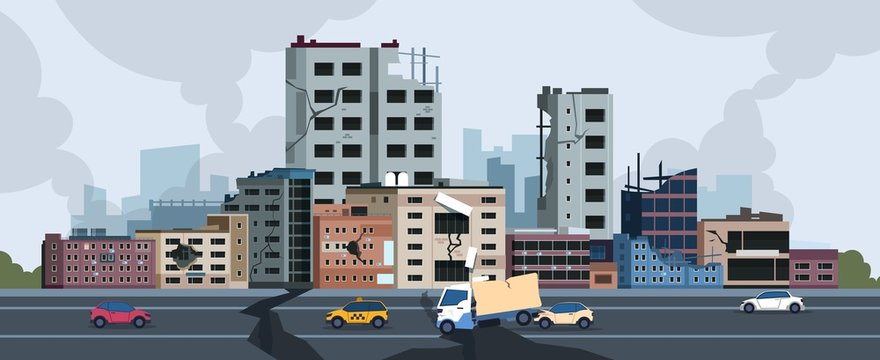

In 2015, the capital of Nepal experienced a 7.8 magnitude earthquake. The earthquake took the lives of many, destroyed thousands of buildings, and caused an estimated damage of $10 billion USD. The project aims to develop a predictive model for assessing building damage caused by the devastating earthquake that struck Nepal in 2015.

## Data Source:
The primary data source for this project is Open Data Nepal, which  contains a comprehensive dataset on the 2015 Nepal earthquake and its impact on buildings in the Gorkha district. This dataset may include information on various factors such as building characteristics, geographical location, structural integrity, and damage severity.

## Import Libraries

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from category_encoders import OrdinalEncoder


In [63]:
!pip install category_encoders


##Load the dataset

In [64]:
df = pd.read_csv("/content/drive/MyDrive/data_earthquake/nebal_data/nepal_data.csv",index_col="b_id")

In [65]:
# Visualize the first five rows
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,technical_solution_proposed,damage_grade
b_id,,,,,,,,,,,,,,,,,,,,,
360106001171,360106001171,36,3609,360902,2,0,4,280,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,Grade 5
360106001181,360106001181,36,3609,360902,1,0,15,120,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,Grade 5
360107000161,360107000161,36,3609,360902,2,0,25,300,14,0,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,Grade 5
360107000381,360107000381,36,3609,360902,2,0,22,155,16,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Reconstruction,Grade 5
360202000691,360202000691,36,3601,360106,2,0,20,240,14,0,...,0,0,0,0,0,0,0,Damaged-Rubble unclear,Reconstruction,Grade 5


#Exploratory Data Analysis(EDA)

In [66]:
print ("Number of Rows     : " ,df.shape[0])
print ("Number of Columns  : " ,df.shape[1])
print ("="*100,"\nFeatures : \n" ,df.columns.tolist())
print ("="*100,"\nMissing values :  ", df.isnull().sum().values.sum())
print ("="*100,"\nUnique values :  \n",df.nunique())
print ("="*100,"\nduplicate values :  \n",df.duplicated().sum())

Number of Rows     :  78074
Number of Columns  :  31
Features : 
 ['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'technical_solution_proposed', 'damage_grade']
Missing values :   0
Unique values :  
 building_id                               78074
district_id                                   1
vdcmun_id                   

The data set contains 78074 observations and 31 columns. Apparently, there are no null or duplicate values on the dataset



In [67]:
# information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78074 entries, 360106001171 to 366709001281
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             78074 non-null  int64 
 1   district_id                             78074 non-null  int64 
 2   vdcmun_id                               78074 non-null  int64 
 3   ward_id                                 78074 non-null  int64 
 4   count_floors_pre_eq                     78074 non-null  int64 
 5   count_floors_post_eq                    78074 non-null  int64 
 6   age_building                            78074 non-null  int64 
 7   plinth_area_sq_ft                       78074 non-null  int64 
 8   height_ft_pre_eq                        78074 non-null  int64 
 9   height_ft_post_eq                       78074 non-null  int64 
 10  land_surface_condition                  78074 non-nu

There seem to be several features in the dataframe with information about the condition of a property after the earthquake.

let's check:

In [68]:
for col in df.columns:
    if "post_eq" in col:
        print(col)

count_floors_post_eq
height_ft_post_eq
condition_post_eq


There are a leaky columns , I will drop them in Data Preparation stage.

In [69]:
df.dtypes

building_id                                int64
district_id                                int64
vdcmun_id                                  int64
ward_id                                    int64
count_floors_pre_eq                        int64
count_floors_post_eq                       int64
age_building                               int64
plinth_area_sq_ft                          int64
height_ft_pre_eq                           int64
height_ft_post_eq                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_c

There are 10  categorical features in the dataset

# Data Preparation


prepare target column


In [70]:
print(df["damage_grade"].value_counts())

Grade 5    27125
Grade 4    22536
Grade 3    15507
Grade 2     8555
Grade 1     4351
Name: damage_grade, dtype: int64


I will create a new target column "severe_damage". For buildings where the "damage_grade" is Grade 4 or above, "severe_damage" should be 1. For all other buildings, "severe_damage" should be 0

In [71]:
#Create binary target
df["damage_grade"]=df["damage_grade"].str[-1].astype(int)
df["severe_damage"]=(df["damage_grade"]>3).astype(int)

In [72]:
print(df["severe_damage"].value_counts())

1    49661
0    28413
Name: severe_damage, dtype: int64


In [73]:
# Drop damage_grade column
df.drop(columns= "damage_grade", inplace=True)


Make sure there's no issue with multicollinearity in the dataset.

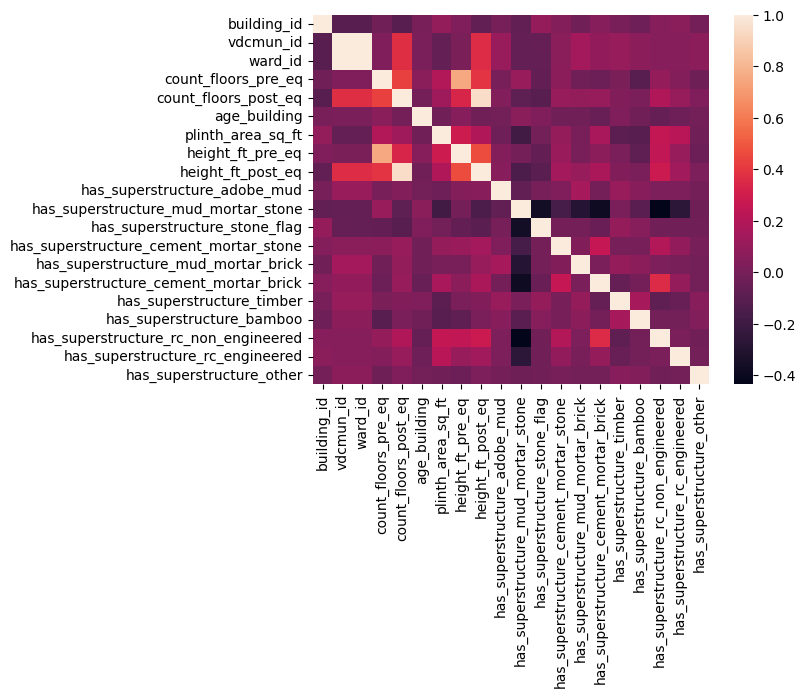

In [74]:
# Create correlation matrix
correlation = df.select_dtypes("number").drop(columns=["severe_damage","district_id"]).corr()
# Plot heatmap of `correlation`
sns.heatmap(correlation);

There is a high correlation between the number of floors in a building and the height of the building, making sense that the more floors you add to the building, the higher the building is. So we need to drop one of these features.

I will drop the one with the least correlation(the least predictive power) to the target column.

In [75]:
df["severe_damage"].corr(df["count_floors_pre_eq"])

0.009728806263020336

In [76]:
df["severe_damage"].corr(df["height_ft_pre_eq"])

-0.038584800931797995

Drop the "count_floors_pre_eq" column.

In [77]:
df.drop(columns= "count_floors_pre_eq", inplace=True)

handle high cardinality in the dataset

In [78]:
# Check for high- and low-cardinality categorical features
df.select_dtypes("object").nunique()

land_surface_condition          3
foundation_type                 5
roof_type                       3
ground_floor_type               5
other_floor_type                4
position                        4
plan_configuration             10
condition_post_eq               8
technical_solution_proposed     4
dtype: int64

In [101]:
#drop high cardinality
drop_columns=['district_id', 'vdcmun_id', 'ward_id','building_id']
df.drop(columns= drop_columns, inplace=True)


Drop leaky column

In [79]:
# Get leaky columns
leaky_cols=[col for col in df.columns if "post_eq" in col]
# Drop leaky columns
df.drop(columns= leaky_cols, inplace=True)

Before  moving to modeling stage , let's see if I can identify any obvious differences between houses that were severely damaged in the earthquake ("severe_damage"==1) those that were not ("severe_damage"==0). Let's start with a numerical feature.

Create a boxplot that shows the distributions of the "height_ft_pre_eq" column for both groups in the "severe_damage" column


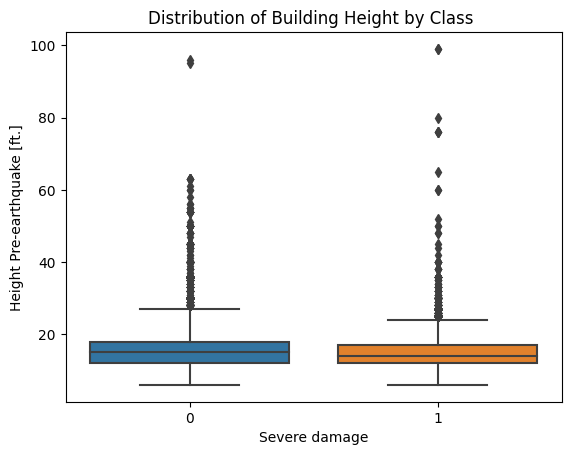

In [80]:
# Create boxplot
sns.boxplot(x="severe_damage",y="height_ft_pre_eq",data= df)
# Label axes
plt.xlabel("Severe damage")
plt.ylabel("Height Pre-earthquake [ft.]")
plt.title("Distribution of Building Height by Class ");

There is not a lot of difference between these two distributions.

Before I move on to the many categorical features in this dataset, it's a good idea to see the balance between the two classes. What percentage were severely damaged, what percentage were not?

Create a bar chart of the value counts for the "severe_damage" column.

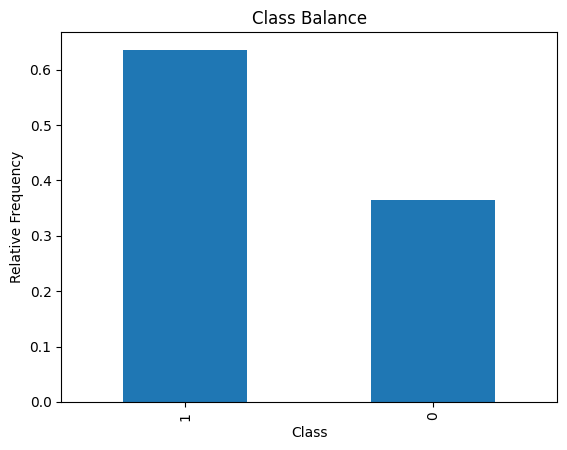

In [81]:
# Plot value counts of `"severe_damage"`
df["severe_damage"].value_counts(normalize= True).plot(kind="bar",xlabel="Class",
                                                       ylabel="Relative Frequency"
                                                       ,title="Class Balance");

The dataset isn't imbalanced.

In [82]:
#two variables, majority_class_prop and minority_class_prop, to store the normalized value counts for the two classes in df["severe_damage"]
majority_class_prop, minority_class_prop = df["severe_damage"].value_counts(normalize= True)
print(majority_class_prop, minority_class_prop)

0.6360760304326665 0.3639239695673336


Are buildings with certain foundation types more likely to suffer severe damage?

Create a pivot table of df where the index is "foundation_type" and the values come from the "severe_damage" column, aggregated by the mean.

In [83]:
# Create pivot table
foundation_pivot = pd.pivot_table(
df,index="foundation_type",values= "severe_damage", aggfunc= np.mean).sort_values(by="severe_damage")
foundation_pivot

,severe_damage
foundation_type,
RC,0.027134
Bamboo/Timber,0.321429
Cement-Stone/Brick,0.410200
Mud mortar-Stone/Brick,0.684101
Other,0.801020


For buildings that have a foundation type RC(Reinforced Cement Concrete ), almost 3 per cent of those buildings suffer severe damage. There seems to be a relationship between the type of foundation of a building and whether or not that building suffers severe damage.

How do the proportions in foundation_pivot compare to the proportions for our majority and minority classes?

Plot foundation_pivot as horizontal bar chart, adding vertical lines at the values for majority_class_prop and minority_class_prop.



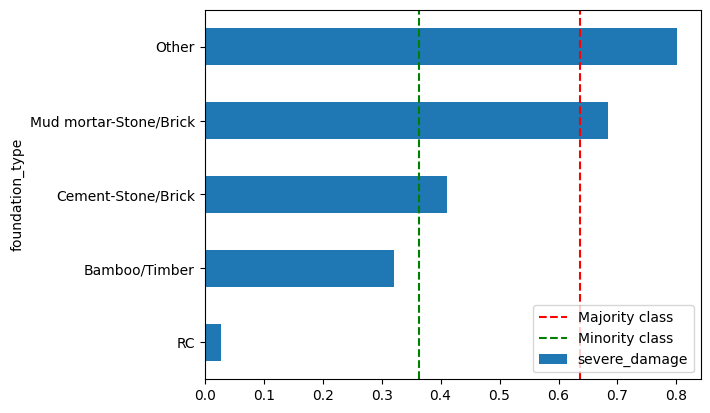

In [84]:
# Plot bar chart of `foundation_pivot`
foundation_pivot.plot(kind="barh",legend=None)
plt.axvline(
    majority_class_prop,linestyle="--",color= "red",label="Majority class")
plt.axvline(minority_class_prop,linestyle="--",color="green",label="Minority class")
plt.legend(loc="lower right");

As we thought, we can see very clearly that building with foundations other has a much higher rate of severe damage. in contrast, the building with foundation RC has a much lower proportion of severely damage buildings.

#Split

In [106]:
#Create the feature matrix X and target vector y
target = "severe_damage"
X = df.drop(columns="severe_damage")
y = df["severe_damage"]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62459, 22)
y_train shape: (62459,)
X_test shape: (15615, 22)
y_test shape: (15615,)


#Build Model

## Baseline

In [109]:
# Build model
model = make_pipeline(
 OneHotEncoder(use_cat_names=True),
 LogisticRegression(max_iter=1000)
)
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'technical_solution_proposed'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Evaluate

In [110]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.92
Test Accuracy: 0.92


# Decision Tree

Divide the training data (X_train and y_train) into training and validation sets using a randomized train-test split.

In [111]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,test_size=0.2,random_state=42
)

In [112]:
# Build Model
model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(random_state=42)
)
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'technical_solution_proposed'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundati...
                                          'data_type': dtype('O'),
                                          'mapping': Rectangular                         1
Square                              2
T-shape                             3
L-shape                             4
U-shape                             5
Others                              6
Multi-projected                     7
Building with Central Courtyard     8
E-shape                             9
H-shape                            10
NaN                                -2
dtype: int64},
                                         {'col': 'technical_solution_proposed',
                                          'data_type': dtype('O'),
                                          'mapping': Reconstruction    1
Major repair      2
Minor repair      3
No need           4
NaN              -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [113]:
acc_train = accuracy_score(y_train,model.predict(X_train))
acc_val = model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 1.0
Validation Accuracy: 0.87


see how deep the tree grew during training.

In [114]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 43


Create a range of possible values for max_depth hyperparameter of my model

In [115]:
depth_hyperparams = range(1,50,2)

In [116]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model =  make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(max_depth=d,random_state=42)
)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.9157243780895391, 0.9161046290551764, 0.9176456461264435]
Validation Accuracy Scores: [0.9141050272174192, 0.9143451809157861, 0.9149855907780979]


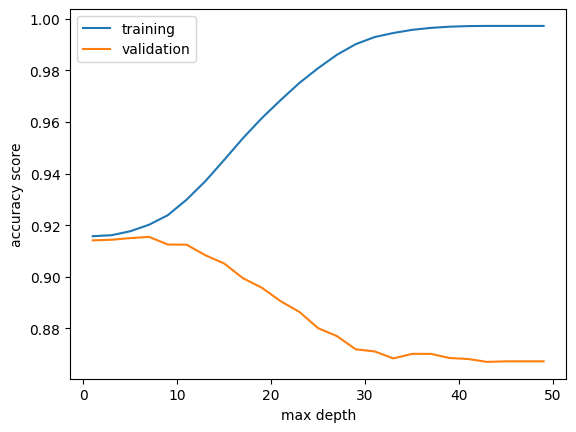

In [117]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams,training_acc,label="training")
plt.plot(depth_hyperparams,validation_acc,label="validation")
plt.xlabel("max depth")
plt.ylabel("accuracy score")
plt.legend();

Based on the visualization, the max_depth value that leads to the best validation accuracy score is 10 .Then retrain the original model with that max_depth

In [118]:
# Build Model
tuned_model = make_pipeline(
    OrdinalEncoder(), DecisionTreeClassifier(max_depth=10,random_state=42)
)
# Fit model to training data
tuned_model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'technical_solution_proposed'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundati...
                                          'mapping': Rectangular                         1
Square                              2
T-shape                             3
L-shape                             4
U-shape                             5
Others                              6
Multi-projected                     7
Building with Central Courtyard     8
E-shape                             9
H-shape                            10
NaN                                -2
dtype: int64},
                                         {'col': 'technical_solution_proposed',
                                          'data_type': dtype('O'),
                                          'mapping': Reconstruction    1
Major repair      2
Minor repair      3
No need           4
NaN              -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=10, random_state=42))])

In [119]:
acc_train = accuracy_score(y_train,tuned_model.predict(X_train))
acc_val = tuned_model.score(X_val,y_val)

print("Training Accuracy:", round(acc_train, 2))
print("Validation Accuracy:", round(acc_val, 2))

Training Accuracy: 0.93
Validation Accuracy: 0.91


In [120]:
test_acc = tuned_model.score(X_test,y_test)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 0.92


#Communicate

Visualize the decision logic of the final model.

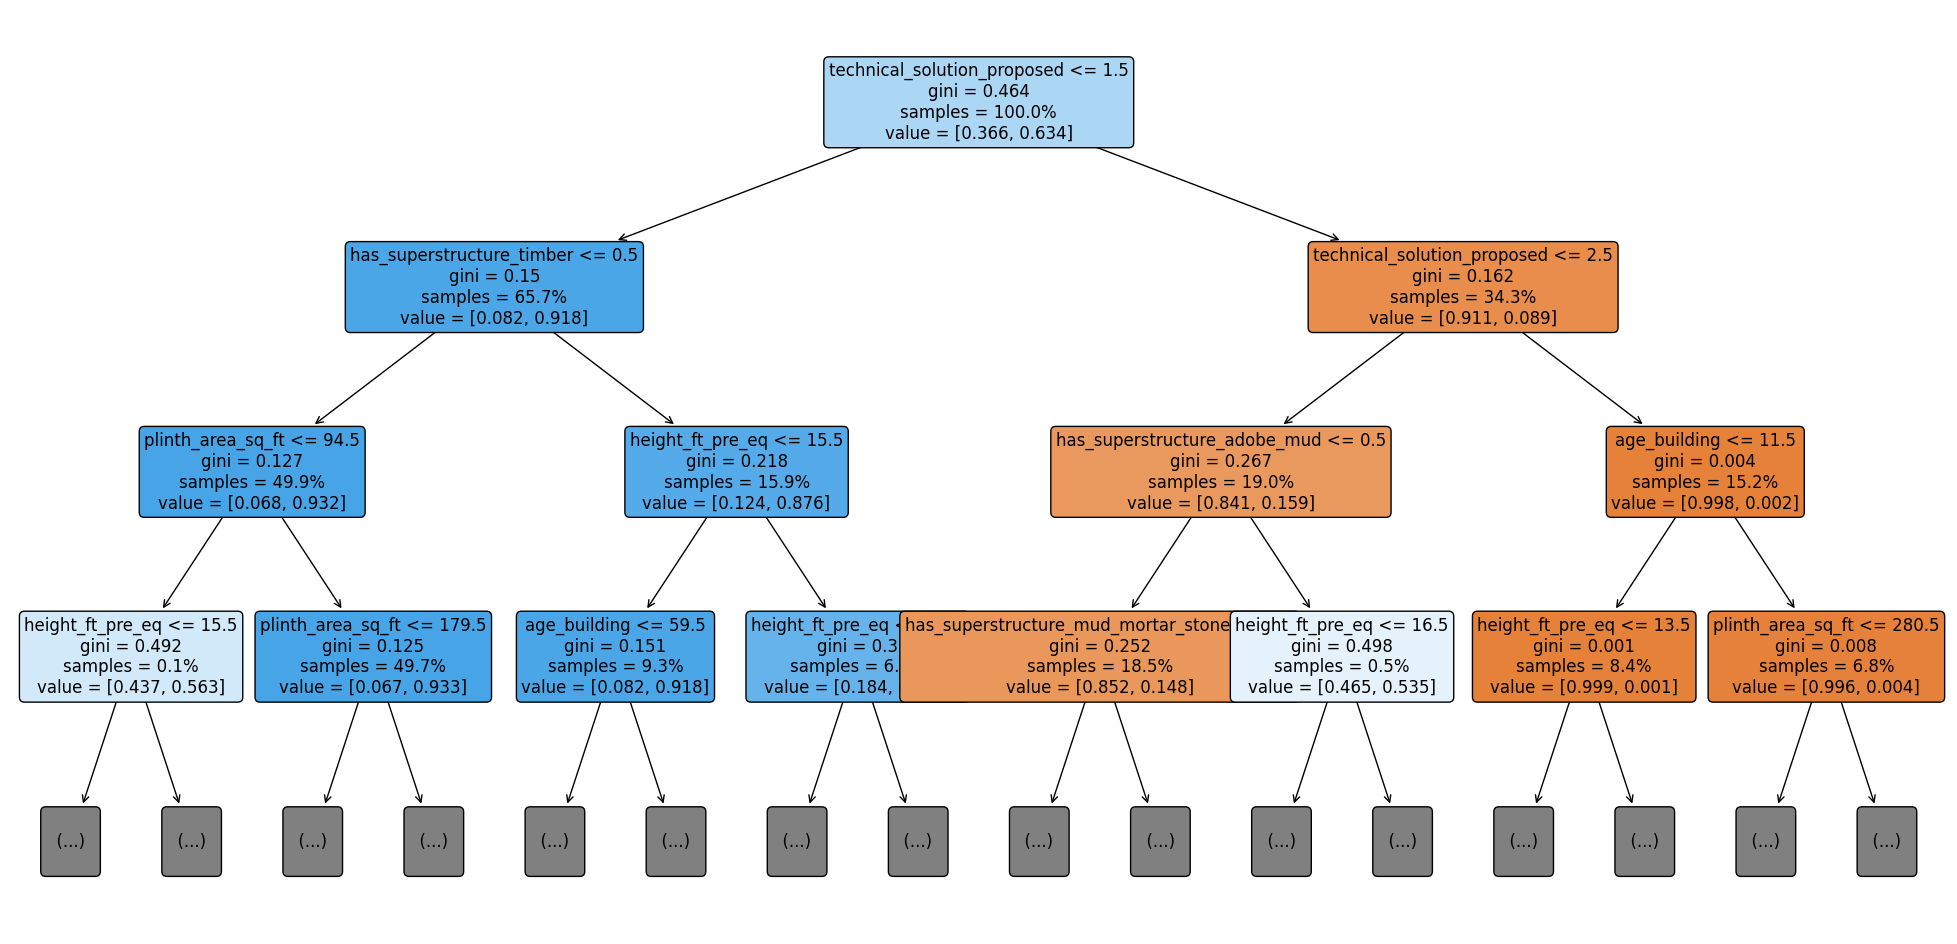

In [121]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=tuned_model.named_steps["decisiontreeclassifier"],
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=3,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

Access the feature_importances_ attribute of the DecisionTreeClassifier model

In [122]:
features = X_train.columns
importances = tuned_model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq'], dtype='object')
Importances: [0.00884869 0.01535503 0.01729186]


In [123]:
feat_imp = pd.Series(importances, index=features)
feat_imp.head()

age_building              0.008849
plinth_area_sq_ft         0.015355
height_ft_pre_eq          0.017292
land_surface_condition    0.004631
foundation_type           0.002475
dtype: float64

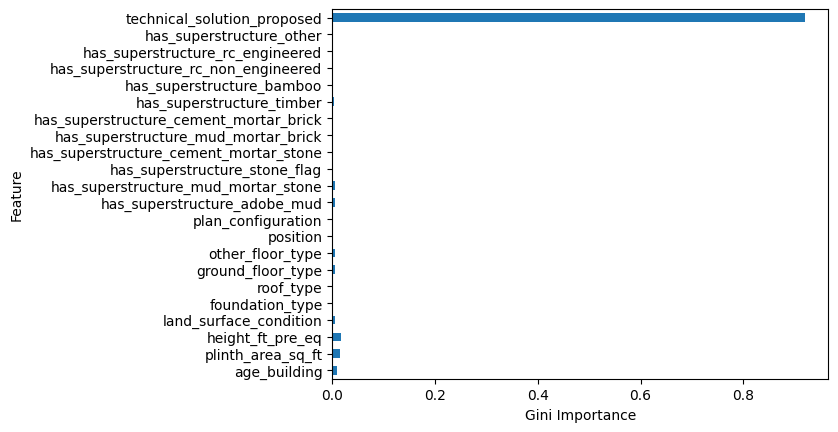

In [125]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

Notice that the gini importance for the technical_solution_proposed feature is 0.6 and this means over the course of the splits that are tree does going from the root to the leaves,the technical_solution_proposed feature is responsible for about 90% of that increase purity in the nodes or decrease impurity in the nodes.